In [1]:
#importing required packages

#modelues for EDA steps
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

#modules for data cleaning and data analysis
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats

#modules for model building


#baseline linear model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#modules for hyper parameter tuning
from sklearn.model_selection import GridSearchCV

#modules for model evaluation
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, accuracy_score, f1_score, r2_score
from sklearn.metrics import precision_recall_curve, roc_curve

#modules for avoiding warnings
import warnings
warnings.filterwarnings('ignore')

#setting backend for matplotlib
%matplotlib inline

#setting formatting options
pd.options.display.max_columns = 100
pd.options.display.max_rows = 900
pd.set_option('float_format' , '{:f}'.format)

#setting plot style
plt.style.use('seaborn-darkgrid')
%matplotlib inline

from pathlib import Path

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
#from mord import LogisticIT #If you're looking for ordinal multi-class (more than 2 levels)
import matplotlib.pylab as plt
import seaborn as sns
from dmba import classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score
from scipy import stats
import math
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
import dmba
from dmba import plotDecisionTree, classificationSummary, regressionSummary


In [2]:
#loading the dataset

fraud_df = pd.read_csv('fraudTrain.csv')

fraud_df.head()

,Index,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,1/1/2019 0:00,2703190000000000.000000,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",3/9/1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,1/1/2019 0:00,630423000000.000000,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,6/21/1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,1/1/2019 0:00,38859500000000.000000,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1/19/1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,1/1/2019 0:01,3534090000000000.000000,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1/12/1967,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,1/1/2019 0:03,375534000000000.000000,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,3/28/1986,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [3]:

fraud_df.drop(fraud_df.columns[:1], axis=1, inplace=True)
fraud_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,1/1/2019 0:00,2703190000000000.000000,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",3/9/1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1/1/2019 0:00,630423000000.000000,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,6/21/1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,1/1/2019 0:00,38859500000000.000000,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1/19/1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,1/1/2019 0:01,3534090000000000.000000,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1/12/1967,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,1/1/2019 0:03,375534000000000.000000,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,3/28/1986,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
#converting trans_date_trans_time into datetime
fraud_df['trans_date_trans_time'] = pd.to_datetime(fraud_df['trans_date_trans_time'])
print(fraud_df.dtypes['trans_date_trans_time'])
fraud_df.head()

datetime64[ns]


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:00,2703190000000000.000000,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",3/9/1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:00,630423000000.000000,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,6/21/1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:00,38859500000000.000000,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1/19/1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:00,3534090000000000.000000,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1/12/1967,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:00,375534000000000.000000,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,3/28/1986,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
fraud_df.dtypes

trans_date_trans_time    datetime64[ns]
cc_num                          float64
merchant                         object
category                         object
amt                             float64
first                            object
last                             object
gender                           object
street                           object
city                             object
state                            object
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                              object
trans_num                        object
unix_time                         int64
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
dtype: object

In [6]:
#let us look at the number of unique values in the dataset
fraud_df.nunique()

trans_date_trans_time     476595
cc_num                       943
merchant                     693
category                      14
amt                        48602
first                        348
last                         479
gender                         2
street                       965
city                         879
state                         51
zip                          952
lat                          950
long                         951
city_pop                     865
job                          493
dob                          950
trans_num                1048575
unix_time                1030650
merch_lat                1016437
merch_long               1034825
is_fraud                       2
dtype: int64

In [7]:
# deriving additonal columns from 'trans_date_trans_time'
#deriving hour
fraud_df['trans_hour'] = fraud_df['trans_date_trans_time'].dt.hour
#deriving 'day of the week'
fraud_df['trans_day_of_week'] = fraud_df['trans_date_trans_time'].dt.day_name()
#deriving 'year_month'
fraud_df['trans_year_month'] = fraud_df['trans_date_trans_time'].dt.to_period('M')

fraud_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,trans_day_of_week,trans_year_month
0,2019-01-01 00:00:00,2703190000000000.000000,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",3/9/1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Tuesday,2019-01
1,2019-01-01 00:00:00,630423000000.000000,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,6/21/1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Tuesday,2019-01
2,2019-01-01 00:00:00,38859500000000.000000,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1/19/1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,Tuesday,2019-01
3,2019-01-01 00:01:00,3534090000000000.000000,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1/12/1967,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Tuesday,2019-01
4,2019-01-01 00:03:00,375534000000000.000000,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,3/28/1986,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Tuesday,2019-01


In [8]:
fraud_df['dob'] = pd.to_datetime(fraud_df['dob'])
fraud_df['age'] = ((fraud_df['trans_date_trans_time'] - fraud_df['dob']).dt.days / 365.25).astype(int)

fraud_df['age'].head()


0    30
1    40
2    56
3    51
4    32
Name: age, dtype: int32

In [9]:
#dropping variables
fraud_df.drop(['trans_date_trans_time','first', 'last', 'dob'] , axis=1, inplace=True)
fraud_df.head()

,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,trans_day_of_week,trans_year_month,age
0,2703190000000000.000000,"fraud_Rippin, Kub and Mann",misc_net,4.970000,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Tuesday,2019-01,30
1,630423000000.000000,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Tuesday,2019-01,40
2,38859500000000.000000,fraud_Lind-Buckridge,entertainment,220.110000,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,Tuesday,2019-01,56
3,3534090000000000.000000,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Tuesday,2019-01,51
4,375534000000000.000000,fraud_Keeling-Crist,misc_pos,41.960000,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Tuesday,2019-01,32


In [10]:
#checking the dataset info
fraud_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 22 columns):
 #   Column             Non-Null Count    Dtype    
---  ------             --------------    -----    
 0   cc_num             1048575 non-null  float64  
 1   merchant           1048575 non-null  object   
 2   category           1048575 non-null  object   
 3   amt                1048575 non-null  float64  
 4   gender             1048575 non-null  object   
 5   street             1048575 non-null  object   
 6   city               1048575 non-null  object   
 7   state              1048575 non-null  object   
 8   zip                1048575 non-null  int64    
 9   lat                1048575 non-null  float64  
 10  long               1048575 non-null  float64  
 11  city_pop           1048575 non-null  int64    
 12  job                1048575 non-null  object   
 13  trans_num          1048575 non-null  object   
 14  unix_time          1048575 non-null  int64    
 15

In [11]:
#converting data types that should be categorical into "category"

fraud_df['category'] = fraud_df['category'].astype('category')
fraud_df['gender'] = fraud_df['gender'].astype('category')
fraud_df['is_fraud'] = fraud_df['is_fraud'].astype('category')

fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 22 columns):
 #   Column             Non-Null Count    Dtype    
---  ------             --------------    -----    
 0   cc_num             1048575 non-null  float64  
 1   merchant           1048575 non-null  object   
 2   category           1048575 non-null  category 
 3   amt                1048575 non-null  float64  
 4   gender             1048575 non-null  category 
 5   street             1048575 non-null  object   
 6   city               1048575 non-null  object   
 7   state              1048575 non-null  object   
 8   zip                1048575 non-null  int64    
 9   lat                1048575 non-null  float64  
 10  long               1048575 non-null  float64  
 11  city_pop           1048575 non-null  int64    
 12  job                1048575 non-null  object   
 13  trans_num          1048575 non-null  object   
 14  unix_time          1048575 non-null  int64    
 15

In [12]:
#determing the shape of the dataset
fraud_df.shape

(1048575, 22)

In [13]:
#describing the dataset
fraud_df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,trans_hour,age
count,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000
mean,417156502027958336.000000,70.279095,48801.590604,38.533364,-90.226256,89057.759063,1344905832.778656,38.533463,-90.226477,12.800773,45.386577
std,1308811172818672640.000000,159.951841,26898.040351,5.076852,13.758582,302435.057620,10196997.483775,5.111233,13.770929,6.816861,17.380873
min,60416207185.000000,1.000000,1257.000000,20.027100,-165.672300,23.000000,1325376018.000000,19.027785,-166.671242,0.000000,13.000000
25%,180040000000000.000000,9.640000,26237.000000,34.620500,-96.798000,743.000000,1336682353.000000,34.729540,-96.898639,7.000000,32.000000
50%,3520550000000000.000000,47.450000,48174.000000,39.354300,-87.476900,2456.000000,1344901521.000000,39.362945,-87.439226,14.000000,43.000000
75%,4642260000000000.000000,83.050000,72042.000000,41.940400,-80.158000,20328.000000,1354366012.000000,41.956021,-80.232279,19.000000,56.000000
max,4992350000000000000.000000,28948.900000,99783.000000,66.693300,-67.950300,2906700.000000,1362931730.000000,67.510267,-66.950902,23.000000,95.000000


In [14]:
#let us check the percentage of fraudulent data points in our dataset
100 * fraud_df.groupby('is_fraud').size() / len(fraud_df)


is_fraud
0   99.427223
1    0.572777
dtype: float64

In [15]:
#looking at distribution of amount
pd.concat(
    [fraud_df['amt'].describe(percentiles = [0.5,0.95,0.999]).reset_index().rename(columns={'index': 'Row Type', 'amt':'Total Amount Distribution'}),
     fraud_df.loc[fraud_df['is_fraud']==0,['amt']].describe(percentiles = [0.5,0.95,0.999]).reset_index(drop = 1).rename(columns={'amt':'Non-Fraud Amount Distribution'}),
     fraud_df.loc[fraud_df['is_fraud']==1,['amt']].describe(percentiles = [0.5,0.95,0.999]).reset_index(drop = 1).rename(columns={'amt':'Fraud Amount Distribution'})], axis=1)

,Row Type,Total Amount Distribution,Non-Fraud Amount Distribution,Fraud Amount Distribution
0,count,1048575.000000,1042569.000000,6006.000000
1,mean,70.279095,67.627445,530.573492
2,std,159.951841,153.695606,391.333069
3,min,1.000000,1.000000,1.180000
4,50%,47.450000,47.220000,391.165000
5,95%,196.260000,189.940000,1085.052500
6,99.9%,1496.830880,1502.239520,1289.066100
7,max,28948.900000,28948.900000,1371.810000


Anomaly Detection:

Real-time monitoring can involve continuously updating and presenting these percentiles to identify anomalies or sudden shifts in transaction amounts. A transaction significantly above the 99.9th percentile may raise alerts for further investigation.

Threshold Setting:

Percentiles can help in setting dynamic thresholds for transaction amounts. For instance, a threshold for potential fraud detection could be set at the 95th or 99th percentile, adapting to the changing distribution of transaction amounts.

User Education:

Percentiles can be used in educational materials for users, helping them understand the typical range of transaction amounts and alerting them to be cautious if a transaction exceeds a certain percentile threshold.

Model Evaluation:

In the context of machine learning models, these percentiles can be used to evaluate the model's performance in capturing extreme values. Monitoring the 99.9th percentile, for example, can help ensure that the model is effective in identifying highly unusual transactions.

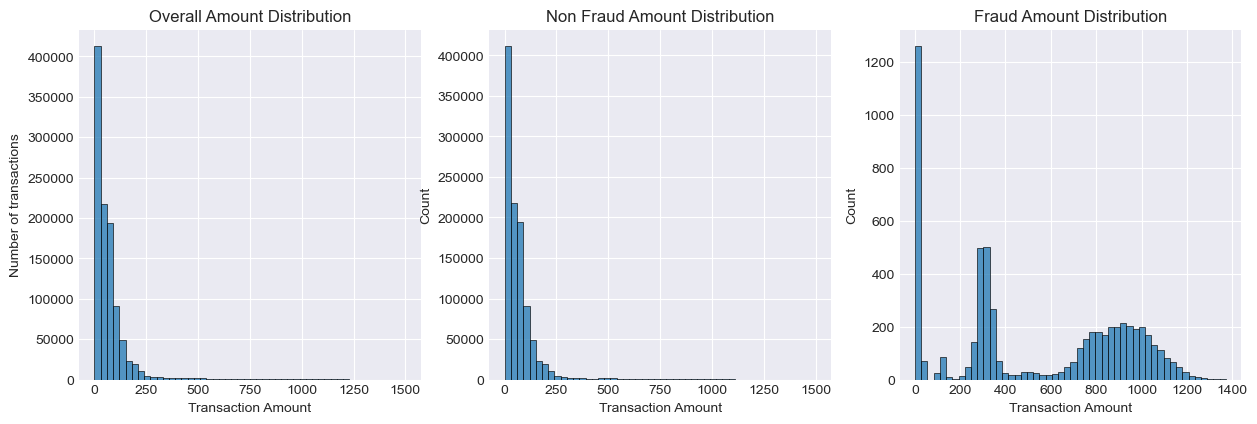

In [16]:
#plotting the above distributions
fig = plt.subplots(figsize=(15,10))

plots = []
#plotting the amt feature

#distribution plots
plots.append(sns.histplot(fraud_df[fraud_df.amt <= 1500].amt, bins=50, ax=plt.subplot(234)))
plots.append(sns.histplot(fraud_df[(fraud_df.is_fraud==0) & (fraud_df.amt<=1500)].amt, bins=50, ax=plt.subplot(235)))
plots.append(sns.histplot(fraud_df[(fraud_df.is_fraud==1) & (fraud_df.amt<=1500)].amt, bins=50, ax=plt.subplot(236)))

#setting titles
plots[0].set_title('Overall Amount Distribution')
plots[1].set_title('Non Fraud Amount Distribution')
plots[2].set_title('Fraud Amount Distribution')

#setting x labels
plots[0].set_xlabel('Transaction Amount')
plots[1].set_xlabel('Transaction Amount')
plots[2].set_xlabel('Transaction Amount')

#setting y label
plots[0].set_ylabel('Number of transactions')

plt.show()

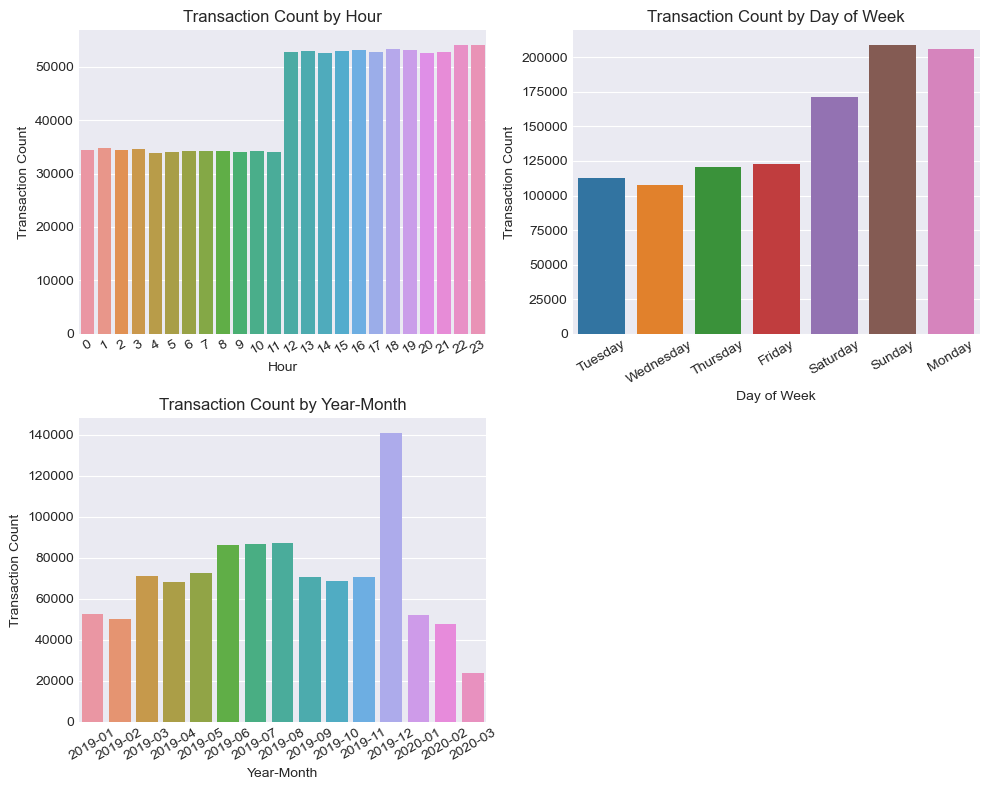

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plotting the 'trans_hour' feature
sns.countplot(x='trans_hour', data=fraud_df, ax=axes[0, 0])
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=30)
axes[0, 0].set_title('Transaction Count by Hour')
axes[0, 0].set_xlabel('Hour')
axes[0, 0].set_ylabel('Transaction Count')

# Plotting the 'trans_day_of_week' feature
sns.countplot(x='trans_day_of_week', data=fraud_df, ax=axes[0, 1])
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=30)
axes[0, 1].set_title('Transaction Count by Day of Week')
axes[0, 1].set_xlabel('Day of Week')
axes[0, 1].set_ylabel('Transaction Count')

# Plotting the 'trans_year_month' feature
sns.countplot(x='trans_year_month', data=fraud_df, ax=axes[1, 0])
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=30)
axes[1, 0].set_title('Transaction Count by Year-Month')
axes[1, 0].set_xlabel('Year-Month')
axes[1, 0].set_ylabel('Transaction Count')

# Hide the empty subplot in the last row and last column
axes[1, 1].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


In [18]:
#year_month vs number of transactions
df_timeline01 = fraud_df.groupby(fraud_df['trans_year_month'])[['trans_num','cc_num']].nunique().reset_index()
df_timeline01.columns = ['year_month','num_of_transactions','customers']
df_timeline01

,year_month,num_of_transactions,customers
0,2019-01,52525,893
1,2019-02,49866,898
2,2019-03,70939,896
3,2019-04,68078,893
4,2019-05,72532,890
5,2019-06,86064,888
6,2019-07,86596,890
7,2019-08,87359,891
8,2019-09,70652,893
9,2019-10,68758,891


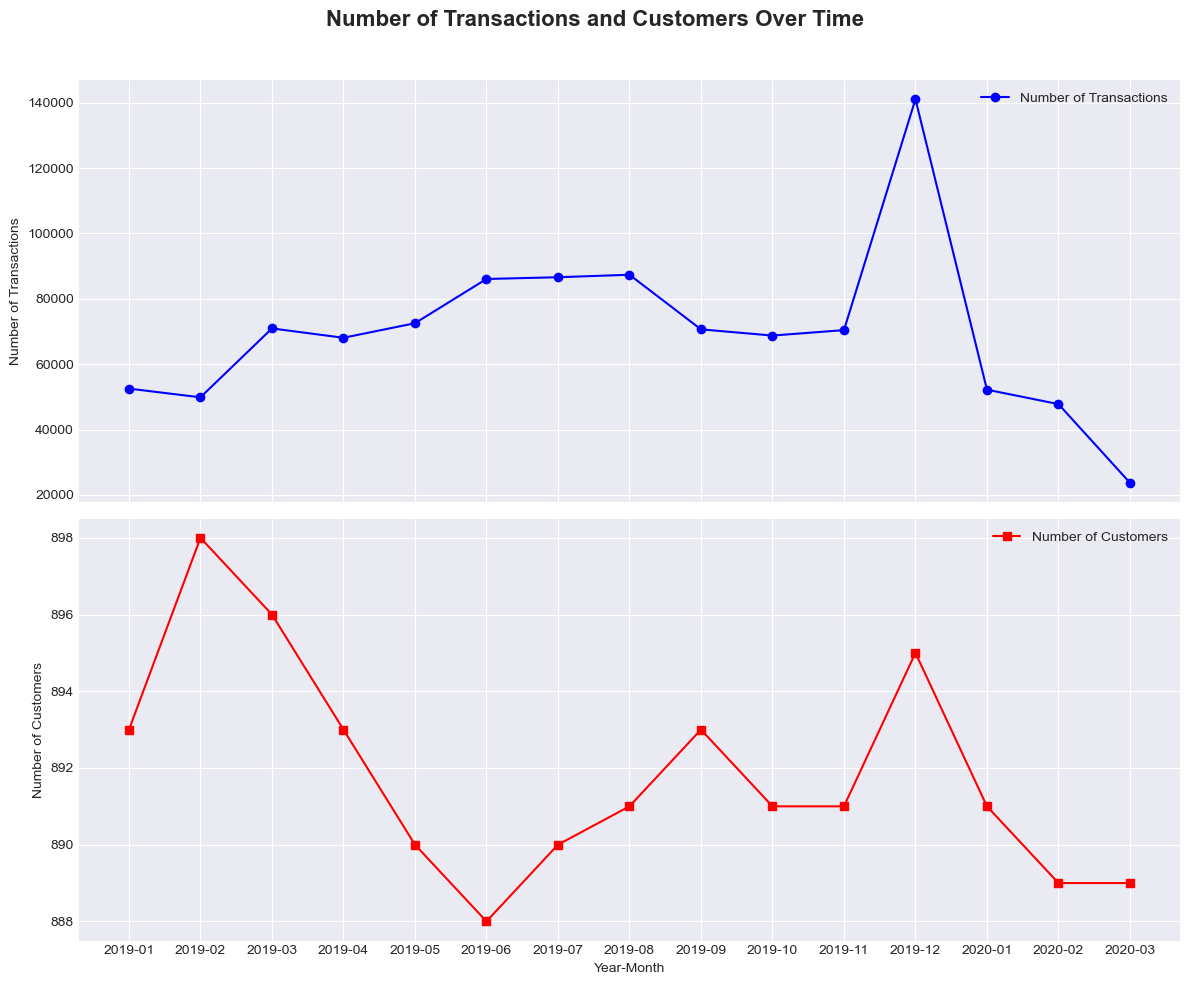

In [19]:
import matplotlib.pyplot as plt

# Convert 'year_month' to string
df_timeline01['year_month'] = df_timeline01['year_month'].astype(str)

# Set up the plots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 10), sharex=True)

# Plotting the number of transactions
ax1.plot(df_timeline01['year_month'], df_timeline01['num_of_transactions'], marker='o', label='Number of Transactions', color='blue')
ax1.set_ylabel('Number of Transactions')
ax1.legend()

# Plotting the number of customers
ax2.plot(df_timeline01['year_month'], df_timeline01['customers'], marker='s', label='Number of Customers', color='red')
ax2.set_xlabel('Year-Month')
ax2.set_ylabel('Number of Customers')
ax2.legend()

# Set title for the entire plot
fig.suptitle('Number of Transactions and Customers Over Time', fontsize=16, fontweight='bold')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Set the rectangle to leave space for the suptitle

# Show the plot
plt.show()


In [20]:
#year_month vs number of transactions
df_timeline01 = fraud_df.groupby(fraud_df['trans_year_month'])[['trans_num','cc_num']].nunique().reset_index()
df_timeline01.columns = ['year_month','num_of_transactions','customers']
df_timeline01

,year_month,num_of_transactions,customers
0,2019-01,52525,893
1,2019-02,49866,898
2,2019-03,70939,896
3,2019-04,68078,893
4,2019-05,72532,890
5,2019-06,86064,888
6,2019-07,86596,890
7,2019-08,87359,891
8,2019-09,70652,893
9,2019-10,68758,891


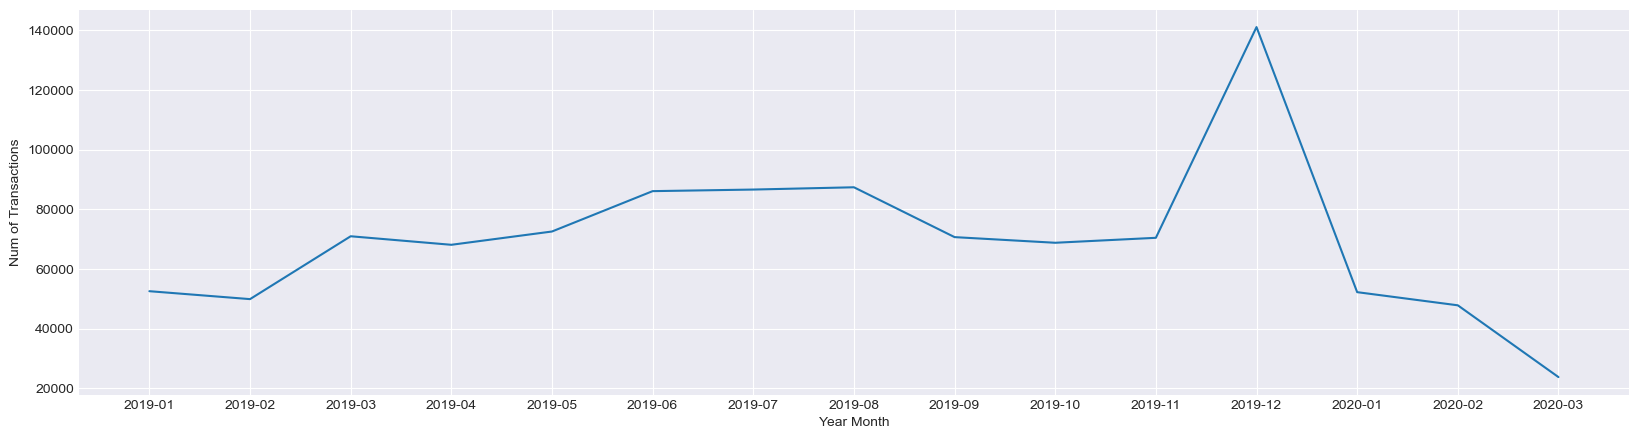

In [21]:
x = np.arange(0,len(df_timeline01),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df_timeline01['num_of_transactions'])
ax.set_xticks(x)
ax.set_xticklabels(df_timeline01['year_month'])

ax.set_xlabel('Year Month')
ax.set_ylabel('Num of Transactions')
plt.show()

In [22]:
df_fraud_transactions = fraud_df[fraud_df['is_fraud']==1]

df_timeline02 = df_fraud_transactions.groupby(df_fraud_transactions['trans_year_month'])[['trans_num','cc_num']].nunique().reset_index()
df_timeline02.columns = ['year_month','num_of_fraud_transactions','fraud_customers']
df_timeline02

,year_month,num_of_fraud_transactions,fraud_customers
0,2019-01,506,50
1,2019-02,517,53
2,2019-03,494,49
3,2019-04,376,41
4,2019-05,408,42
5,2019-06,354,35
6,2019-07,331,36
7,2019-08,382,39
8,2019-09,418,44
9,2019-10,454,50


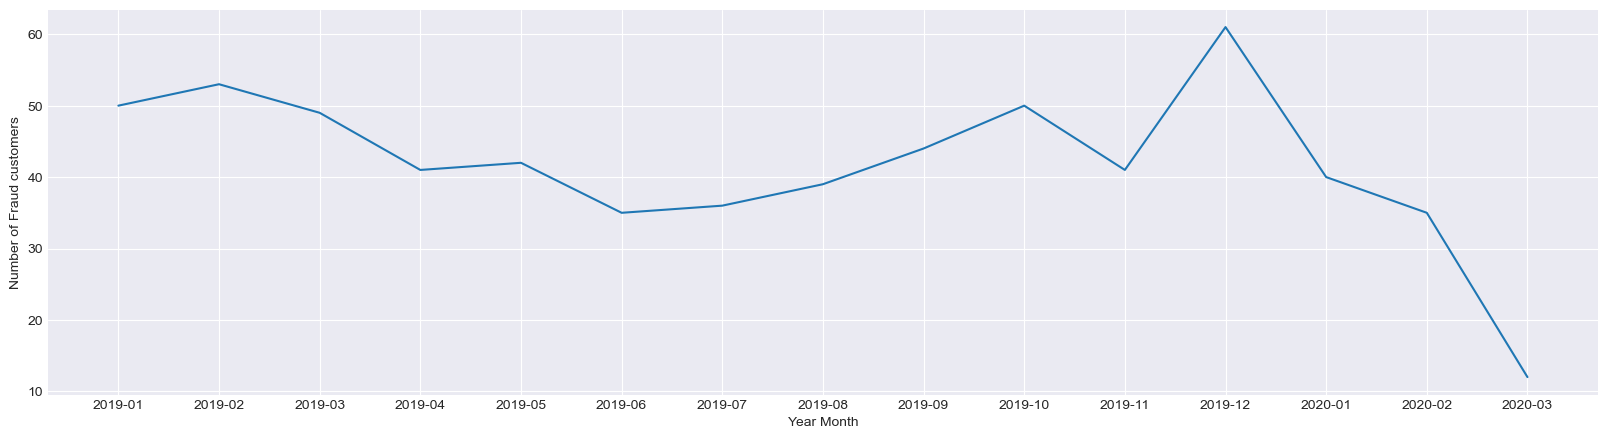

In [23]:
x = np.arange(0,len(df_timeline02),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df_timeline02['fraud_customers'])
ax.set_xticks(x)
ax.set_xticklabels(df_timeline02['year_month'])

ax.set_xlabel('Year Month')
ax.set_ylabel('Number of Fraud customers')
plt.show()

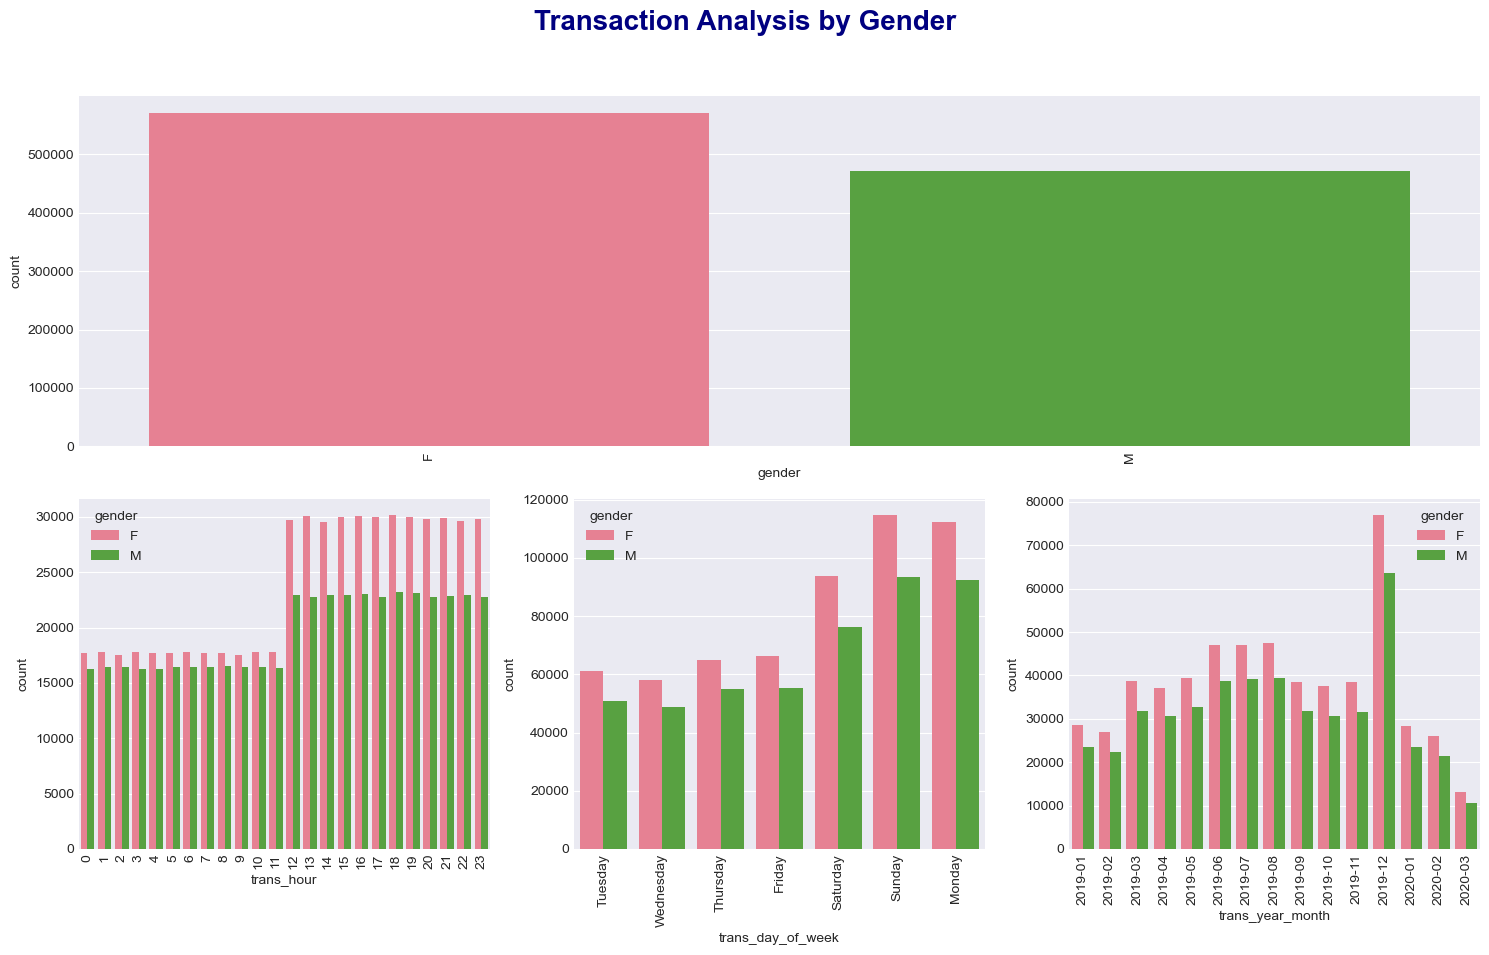

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a color palette for a more vibrant look
color_palette = sns.color_palette("husl", 3)

fig, ax = plt.subplots(figsize=(15, 10))

# Plotting gender demographic with respect to transactions
plot1 = sns.countplot(x='gender', data=fraud_df[fraud_df['is_fraud'] == 0], ax=plt.subplot(211), palette=color_palette)

# Plotting transactions over time, with respect to gender
plot2 = sns.countplot(x='trans_hour', hue='gender', data=fraud_df[fraud_df['is_fraud'] == 0], ax=plt.subplot(234), palette=color_palette)
plot3 = sns.countplot(x='trans_day_of_week', hue='gender', data=fraud_df[fraud_df['is_fraud'] == 0], ax=plt.subplot(235), palette=color_palette)
plot4 = sns.countplot(x='trans_year_month', hue='gender', data=fraud_df[fraud_df['is_fraud'] == 0], ax=plt.subplot(236), palette=color_palette)

# Rotate x-axis labels for better readability
for i in [plot1, plot2, plot3, plot4]:
    i.set_xticklabels(i.get_xticklabels(), rotation=90)

# Customize labels and title
plt.suptitle('Transaction Analysis by Gender', fontsize=20, fontweight='bold', color='navy')

# Add decorative elements
ax.text(0.5, 1.02, 'Gender Demographic Overview', ha='center', va='center', transform=ax.transAxes, color='darkgreen', fontsize=16, fontweight='bold')
ax.text(0.5, 1.02, ' | ', ha='center', va='center', transform=ax.transAxes, color='gray', fontsize=16, fontweight='bold')
ax.text(0.5, 1.02, 'Transactions Over Time', ha='center', va='center', transform=ax.transAxes, color='darkorange', fontsize=16, fontweight='bold')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout for title placement

plt.show()



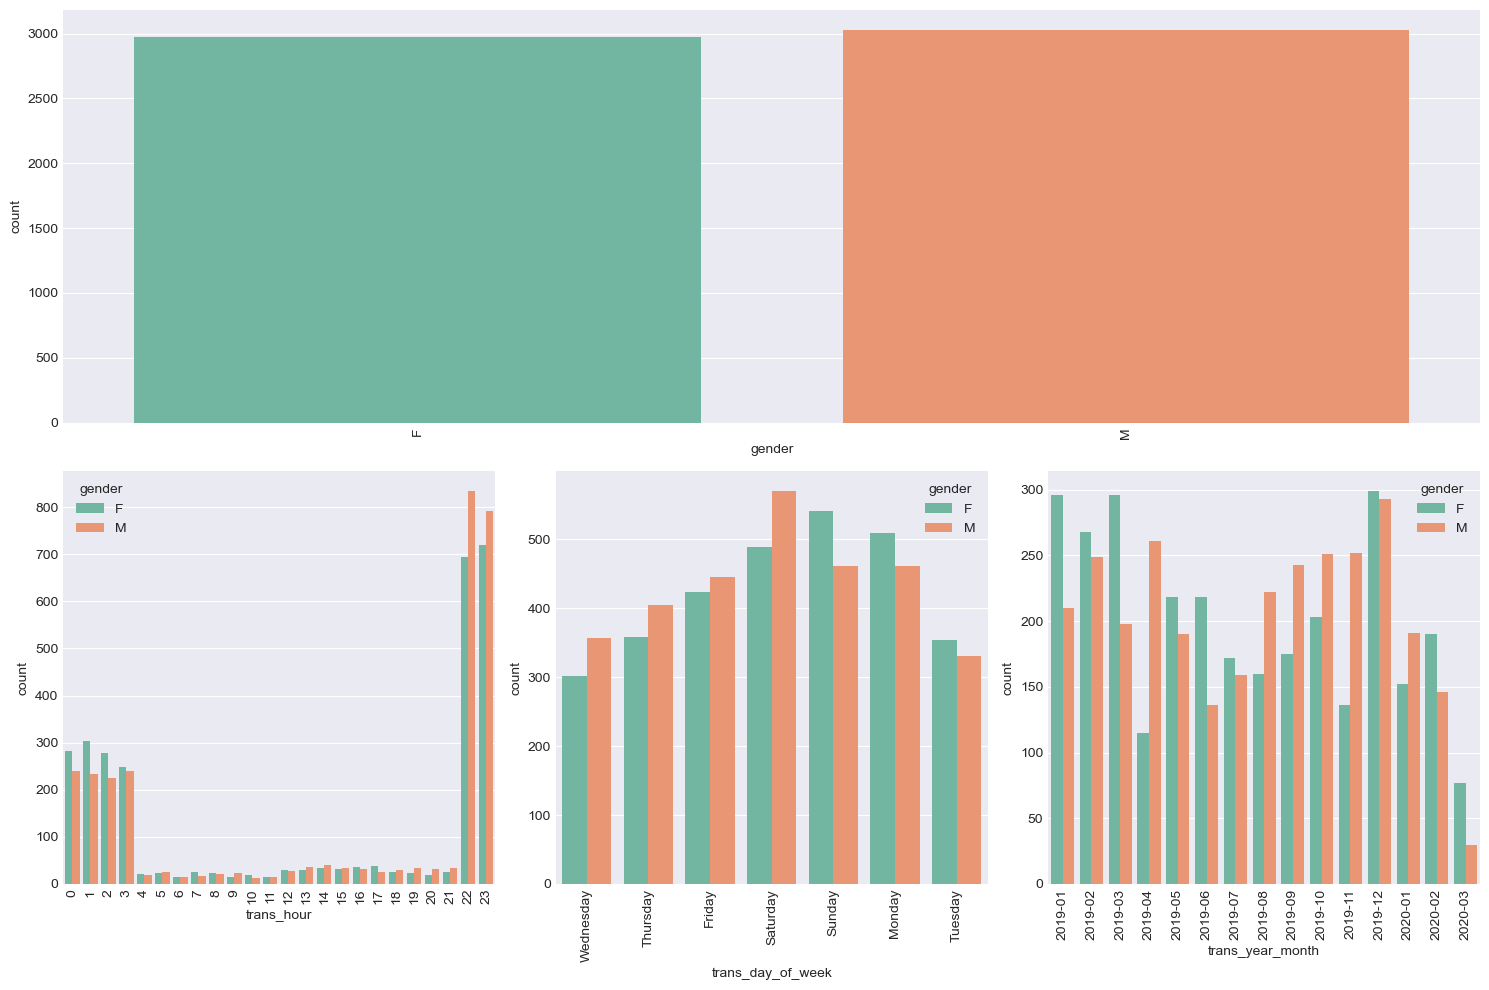

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define custom color palette
custom_palette = sns.color_palette("Set2")

fig, ax = plt.subplots(figsize=(15, 10))

# Plotting gender demographic with respect to transactions
plot1 = sns.countplot(x='gender', data=fraud_df[fraud_df['is_fraud'] == 1], ax=plt.subplot(211), palette=custom_palette)

# Plotting transactions over time, with respect to gender
plot2 = sns.countplot(x='trans_hour', hue='gender', data=fraud_df[fraud_df['is_fraud'] == 1], ax=plt.subplot(234), palette=custom_palette)
plot3 = sns.countplot(x='trans_day_of_week', hue='gender', data=fraud_df[fraud_df['is_fraud'] == 1], ax=plt.subplot(235), palette=custom_palette)
plot4 = sns.countplot(x='trans_year_month', hue='gender', data=fraud_df[fraud_df['is_fraud'] == 1], ax=plt.subplot(236), palette=custom_palette)

# Rotate x-axis labels for better readability
for i in [plot1, plot2, plot3, plot4]:
    i.set_xticklabels(i.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()


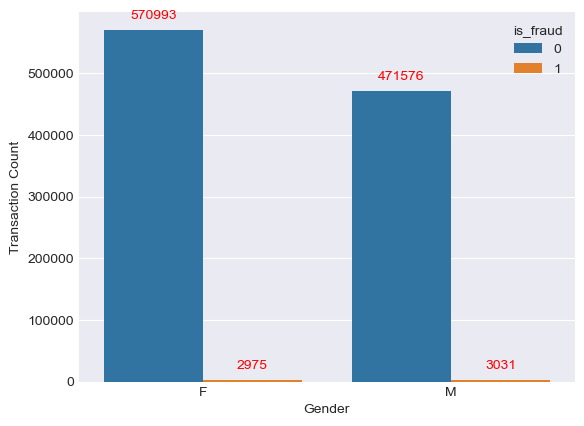

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating the 'gender' distributed dataframe
df_gender = fraud_df[['gender', 'trans_num']].groupby(['gender']).count().reset_index()
df_gender.columns = ['Gender', 'gender_count']

# Creating gender-fraud distribution
df_fraud_gender = fraud_df[['gender', 'trans_num', 'is_fraud']].groupby(['gender', 'is_fraud']).count().reset_index()
df_fraud_gender.columns = ['Gender', 'is_fraud', 'Transaction Count']

df_fraud_gender = df_fraud_gender.merge(df_gender[['Gender', 'gender_count']], how='inner', on='Gender')

df_fraud_gender['Transaction percentage'] = (df_fraud_gender['Transaction Count'] / df_fraud_gender['gender_count']) * 100

# Plotting the bar plot
ax = sns.barplot(data=df_fraud_gender, y='Transaction Count', x='Gender', hue='is_fraud')

# Annotating the bars with counts
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, color='red')

plt.show()


In [27]:

# Create custom bins and labels for age categories
custom_bins = [13, 19, 32, 42, 50,62 , float('inf')]
custom_labels = ['Teenagers', 'Young Adults', 'Adults', 'Middle-aged', 'Seniors', 'Retired']

# Apply the binning to create a new 'age_category' column
fraud_df['age_category'] = pd.cut(fraud_df['age'], bins=custom_bins, labels=custom_labels, right=False)

# Display the result
print(fraud_df[['age', 'age_category']].tail())


         age  age_category
1048570   76       Retired
1048571   20  Young Adults
1048572   67       Retired
1048573   29  Young Adults
1048574   22  Young Adults


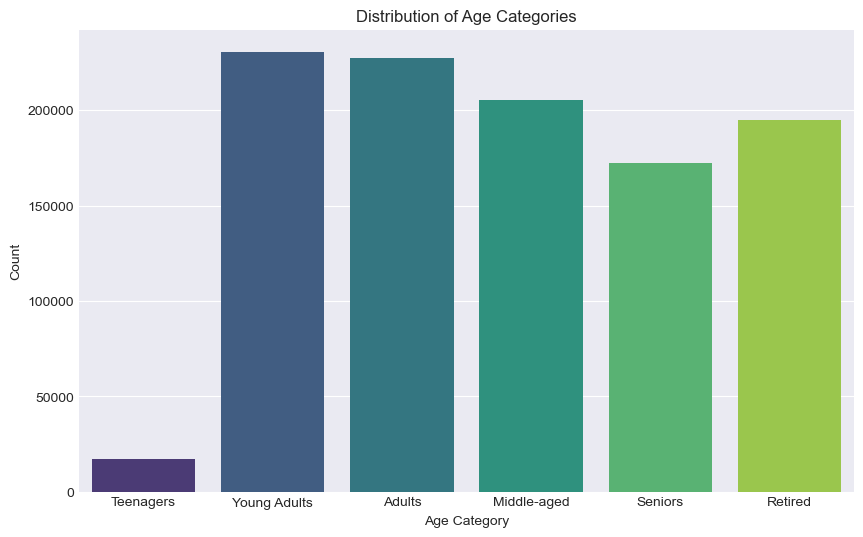

In [28]:
# Set up the plot
plt.figure(figsize=(10, 6))

# Plotting the count of individuals in each age category
sns.countplot(x='age_category', data=fraud_df, order=custom_labels, palette='viridis')

# Adding labels and title
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.title('Distribution of Age Categories')

# Show the plot
plt.show()

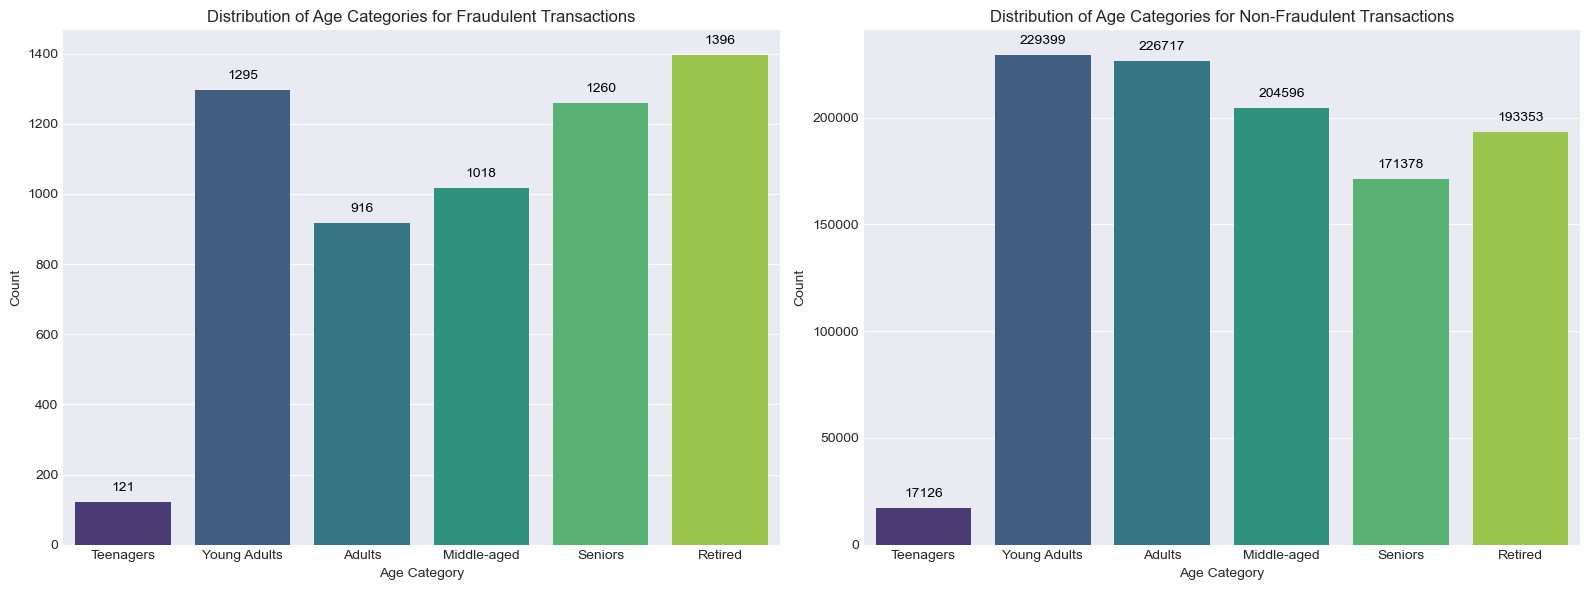

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plotting the count of individuals in each age category for fraudulent transactions
for i, is_fraud_value in enumerate([1, 0]):
    fraud_df_filtered = fraud_df[fraud_df['is_fraud'] == is_fraud_value]
    
    # Plotting
    sns.countplot(x='age_category', data=fraud_df_filtered, order=custom_labels, palette='viridis', ax=axes[i])

    # Adding labels and title
    axes[i].set_xlabel('Age Category')
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'Distribution of Age Categories for {"Fraudulent" if is_fraud_value == 1 else "Non-Fraudulent"} Transactions')

    # Annotating the bars with counts
    for p in axes[i].patches:
        axes[i].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, color='black')

# Adjust layout
plt.tight_layout()
plt.show()


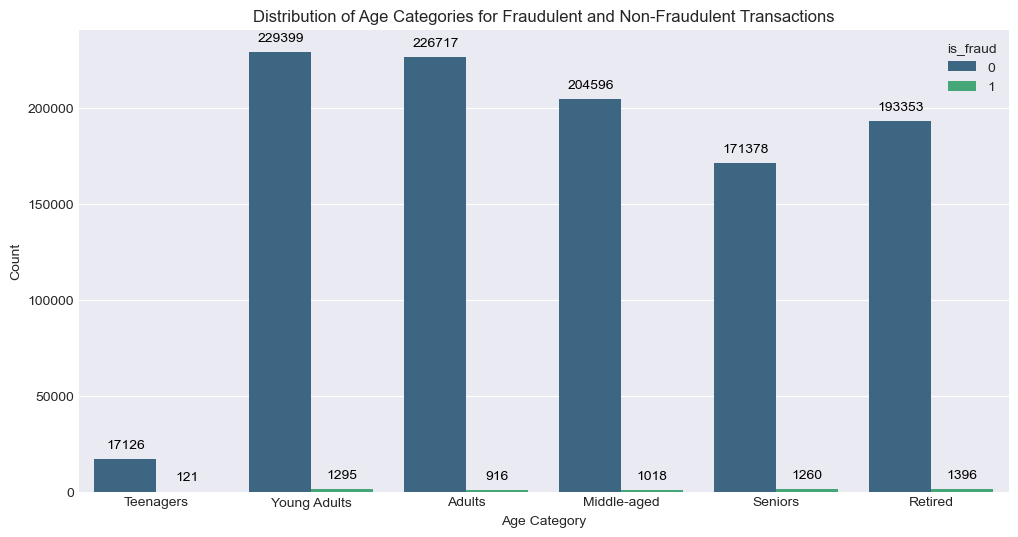

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot
plt.figure(figsize=(12, 6))

# Plotting the count of individuals in each age category for both fraudulent and non-fraudulent transactions
ax = sns.countplot(x='age_category', hue='is_fraud', data=fraud_df, order=custom_labels, palette='viridis')

# Adding labels and title
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.title('Distribution of Age Categories for Fraudulent and Non-Fraudulent Transactions')

# Adding count values on each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, color='black')

# Show the plot
plt.show()


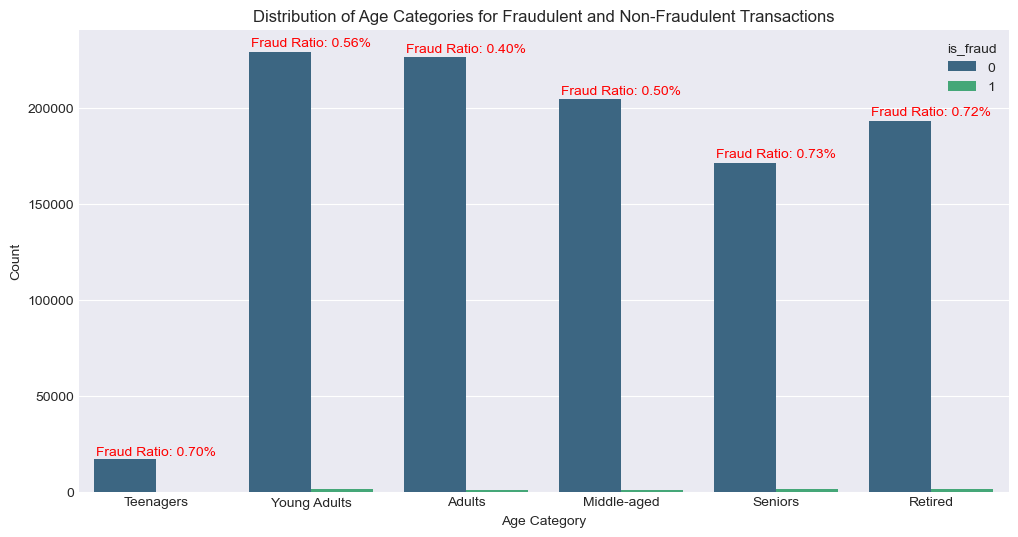

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot
plt.figure(figsize=(12, 6))

# Plotting the count of individuals in each age category for both fraudulent and non-fraudulent transactions
ax = sns.countplot(x='age_category', hue='is_fraud', data=fraud_df, order=custom_labels, palette='viridis')

# Adding labels and title
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.title('Distribution of Age Categories for Fraudulent and Non-Fraudulent Transactions')



# Adding the ratio of fraudulent transactions for each category
for category in custom_labels:
    total_count = fraud_df[fraud_df['age_category'] == category].shape[0]
    fraud_count = fraud_df[(fraud_df['age_category'] == category) & (fraud_df['is_fraud'] == 1)].shape[0]
    ratio = fraud_count / total_count if total_count > 0 else 0
    ax.text(custom_labels.index(category), total_count, f'Fraud Ratio: {ratio:.2%}', 
            ha='center', va='bottom', fontsize=10, color='red')

# Show the plot
plt.show()


In [32]:
#fetching states with high transaction frequecy
high_trans_states = fraud_df.state.value_counts().head(25).index.tolist()
print(high_trans_states)

['TX', 'NY', 'PA', 'CA', 'OH', 'MI', 'IL', 'FL', 'AL', 'MO', 'MN', 'AR', 'NC', 'WI', 'VA', 'SC', 'KY', 'IN', 'IA', 'OK', 'MD', 'GA', 'WV', 'NJ', 'NE']


In [33]:
state_df = 100*fraud_df[fraud_df.state.isin(high_trans_states)].state.value_counts(normalize=True)
print(state_df)

TX   9.586414
NY   8.416395
PA   8.055206
CA   5.710920
OH   4.675331
MI   4.649969
IL   4.380983
FL   4.334632
AL   4.151102
MO   3.879867
MN   3.210089
AR   3.129505
NC   3.085528
WI   2.966590
VA   2.952347
SC   2.947100
KY   2.874388
IN   2.780186
IA   2.708848
OK   2.684236
MD   2.649879
GA   2.628890
WV   2.596656
NJ   2.491586
NE   2.453355
Name: state, dtype: float64


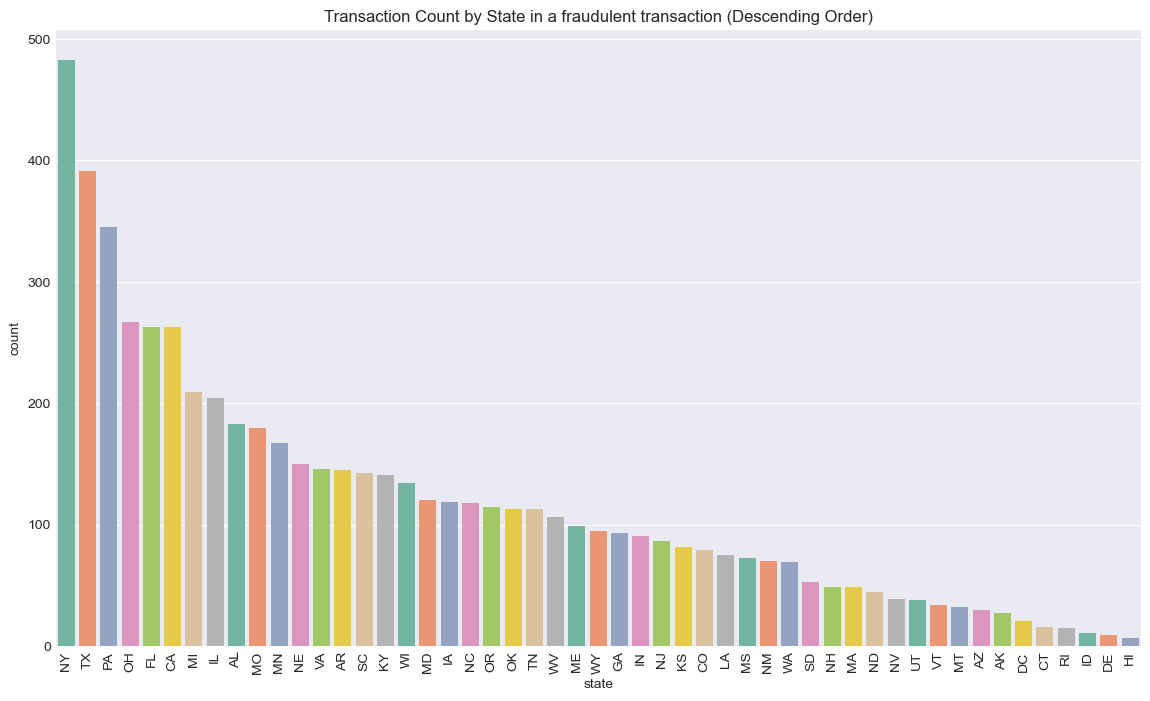

In [34]:
# Set up the plot for is_fraud = 1
fig, ax1 = plt.subplots(figsize=(14, 8))

# Get the order of states by their count in descending order
state_order = fraud_df[fraud_df['is_fraud'] == 1]['state'].value_counts().index

# Plotting the count of each state for is_fraud = 1
plot1 = sns.countplot(x='state', data=fraud_df[fraud_df['is_fraud'] == 1], order=state_order, palette='Set2', ax=ax1)
plot1.set_xticklabels(plot1.get_xticklabels(), rotation=90)

ax1.set_title('Transaction Count by State in a fraudulent transaction (Descending Order)')

# Show the plot for is_fraud = 1
plt.show()


In [35]:
import pandas as pd
from prettytable import PrettyTable

# Calculate fraud ratios for all states
fraud_ratios = []

for state in fraud_df['state'].unique():
    total_count = fraud_df[fraud_df['state'] == state].shape[0]
    fraud_count = fraud_df[(fraud_df['state'] == state) & (fraud_df['is_fraud'] == 1)].shape[0]
    ratio = fraud_count / total_count if total_count > 0 else 0
    fraud_ratios.append({'State': state, 'Fraud Ratio': ratio, 'Total Transactions': total_count})

# Create a DataFrame from the list of dictionaries
fraud_ratio_df = pd.DataFrame(fraud_ratios)

# Print the DataFrame
print(fraud_ratio_df)

# Create a PrettyTable for better visualization
table = PrettyTable()
table.field_names = ["State", "Fraud Ratio", "Total Transactions"]

for _, row in fraud_ratio_df.iterrows():
    table.add_row([row['State'], f'{row["Fraud Ratio"]:.2%}', row['Total Transactions']])




   State  Fraud Ratio  Total Transactions
0     NC     0.004778               24697
1     WA     0.004524               15251
2     ID     0.002440                4509
3     MT     0.003385                9454
4     VA     0.006178               23631
5     PA     0.005351               64475
6     KS     0.004407               18606
7     TN     0.007996               14132
8     IA     0.005488               21682
9     WV     0.005100               20784
10    FL     0.007580               34695
11    CA     0.005754               45711
12    NM     0.005258               13314
13    NJ     0.004362               19943
14    OK     0.005259               21485
15    IN     0.004089               22253
16    MA     0.004915                9970
17    TX     0.005096               76731
18    WI     0.005643               23745
19    MI     0.005615               37219
20    WY     0.006076               15636
21    HI     0.003433                2039
22    NE     0.007639             

In [36]:
#constructing the state-transaction count distribution
df_state = fraud_df[['state','trans_num']].groupby(['state']).count().reset_index()
df_state.columns = ['state', 'state_count']

#creating the state-fraud distribution
df_fraud_state = fraud_df[['state', 'trans_num', 'is_fraud']].groupby(['state','is_fraud']).count().reset_index()
df_fraud_state.columns = ['state', 'is_fraud', 'Transaction count']

df_fraud_state = df_fraud_state.merge(df_state[['state', 'state_count']], how='inner', on='state')

df_fraud_state['Transaction percentage'] = (df_fraud_state['Transaction count']/df_fraud_state['state_count'])*100

#viewing the top 20 states with high fraudulent transactions
df_fraud_state[df_fraud_state['is_fraud'] == 1].sort_values(by = ['Transaction percentage'], ascending=False).head(20)
#states with more than 75% fraudulent transactions
print('state with more than 75% fraudulent transactions:\n')
print(df_fraud_state.loc[(df_fraud_state.is_fraud == 1) & (df_fraud_state['Transaction percentage'] >= 75)].state)

state with more than 75% fraudulent transactions:

17    DE
Name: state, dtype: object


In [37]:
#fetching top 20 jobs with high transaction frequencies
high_trans_jobs = fraud_df.job.value_counts().head(20).index.tolist()
print(high_trans_jobs)

['Film/video editor', 'Exhibition designer', 'Surveyor, land/geomatics', 'Naval architect', 'Materials engineer', 'Designer, ceramics/pottery', 'Systems developer', 'IT trainer', 'Financial adviser', 'Environmental consultant', 'Chartered public finance accountant', 'Copywriter, advertising', 'Chief Executive Officer', 'Scientist, audiological', 'Comptroller', 'Sub', 'Paramedic', 'Agricultural consultant', 'Magazine features editor', 'Podiatrist']


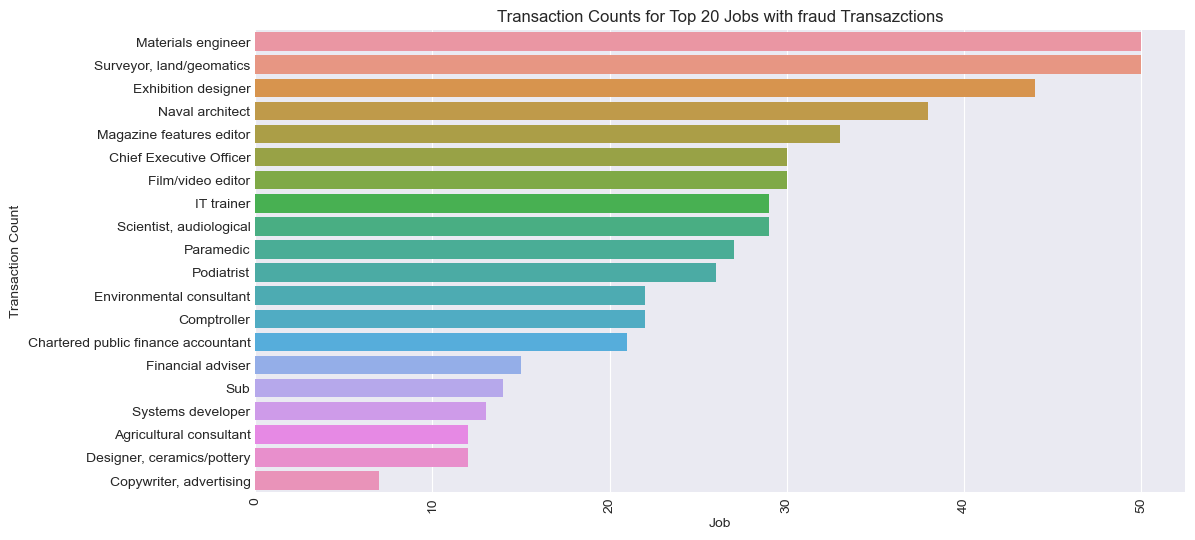

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'fraud_df' with columns 'job' and 'is_fraud'
# 'high_trans_jobs' is a list of the top 20 jobs

# Extract the relevant subset of the DataFrame for 'is_fraud' being 'yes'
subset_df = fraud_df[(fraud_df['job'].isin(high_trans_jobs)) & (fraud_df['is_fraud'] == 1)]

# Create a count plot
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plot = sns.countplot(data=subset_df, y='job', order=subset_df['job'].value_counts().index)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plot.set_xlabel('Job')
plot.set_ylabel('Transaction Count')
plot.set_title('Transaction Counts for Top 20 Jobs with fraud Transazctions')
plt.show()

In [39]:
#constructing the zip-transaction count distribution
df_job = fraud_df[['job','trans_num']].groupby(['job']).count().reset_index()
df_job.columns = ['job', 'job_count']

#creating the zip-fraud distribution
df_fraud_job = fraud_df[['job', 'trans_num', 'is_fraud']].groupby(['job','is_fraud']).count().reset_index()
df_fraud_job.columns = ['job', 'is_fraud', 'Transaction count']

df_fraud_job = df_fraud_job.merge(df_job[['job', 'job_count']], how='inner', on='job')

df_fraud_job['Transaction percentage'] = (df_fraud_job['Transaction count']/df_fraud_job['job_count'])*100

#viewing the top 20 jobs with high fraudulent transaction volumes
df_fraud_job[df_fraud_job['is_fraud'] == 1].sort_values(by = ['Transaction percentage'], ascending=False).head(15)

,job,is_fraud,Transaction count,job_count,Transaction percentage
403,Forest/woodland manager,1,9,9,100.000000
123,Careers adviser,1,15,15,100.000000
843,Ship broker,1,7,7,100.000000
853,Solicitor,1,11,11,100.000000
41,Air traffic controller,1,8,8,100.000000
811,Sales promotion account executive,1,14,14,100.000000
235,Dancer,1,19,19,100.000000
455,Homeopath,1,11,11,100.000000
535,Legal secretary,1,12,12,100.000000
71,Armed forces technical officer,1,8,8,100.000000


In [40]:
fraud_df.category.value_counts(normalize=True)

gas_transport    0.101500
grocery_pos      0.095278
home             0.094965
shopping_pos     0.089982
kids_pets        0.087170
shopping_net     0.075244
entertainment    0.072461
food_dining      0.070611
personal_care    0.070093
health_fitness   0.066149
misc_pos         0.061504
misc_net         0.048716
grocery_net      0.035018
travel           0.031309
Name: category, dtype: float64

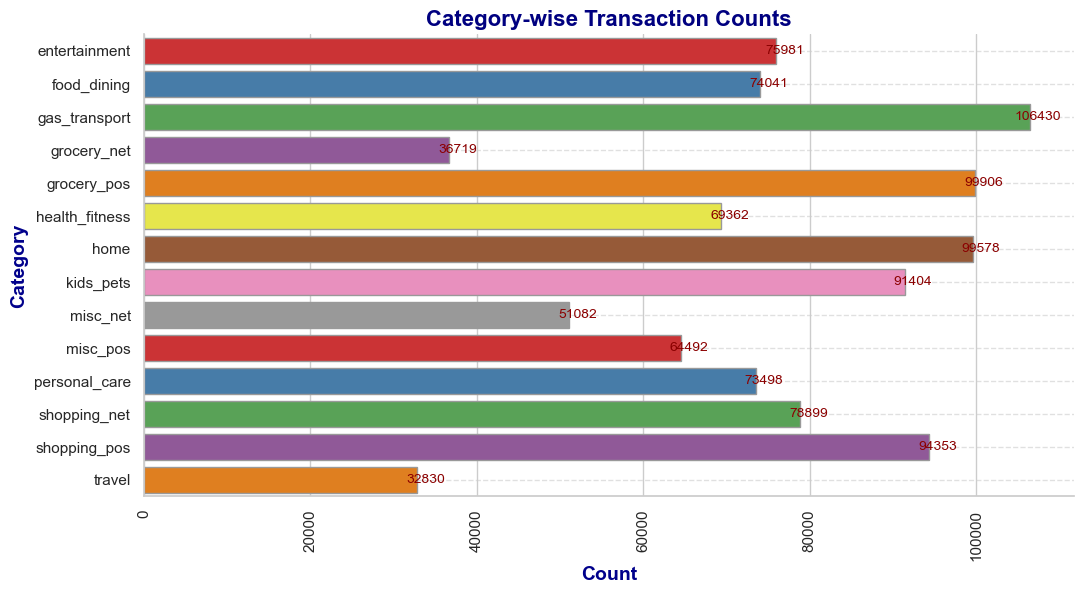

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a custom bright color palette
colors = sns.color_palette("Set1")

# Create a figure and axes with Seaborn's whitegrid style
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Create a countplot
plot = sns.countplot(data=fraud_df, y='category', palette=colors, edgecolor=".6")

# Rotate x-axis labels for better readability
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

# Add a grid for better readability
plot.yaxis.grid(True, linestyle='--', alpha=0.6)

# Customize labels and title
plot.set_xlabel('Count', fontsize=14, fontweight='bold', color='darkblue')
plot.set_ylabel('Category', fontsize=14, fontweight='bold', color='darkblue')
plot.set_title('Category-wise Transaction Counts', fontsize=16, fontweight='bold', color='navy')

# Display counts on top of the bars with a modern look
for p in plot.patches:
    plot.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                  ha='center', va='center', xytext=(6, 0), textcoords='offset points', fontsize=10, color='darkred')

# Remove spines for a cleaner look
sns.despine()

plt.show()


In [42]:
#constructing the category-transaction count distribution
df_category = fraud_df[['category','trans_num']].groupby(['category']).count().reset_index()
df_category.columns = ['category', 'category_count']

#creating the zip-fraud distribution
df_fraud_category = fraud_df[['category', 'trans_num', 'is_fraud']].groupby(['category','is_fraud']).count().reset_index()
df_fraud_category.columns = ['category', 'is_fraud', 'Transaction count']

df_fraud_category = df_fraud_category.merge(df_category[['category', 'category_count']], how='inner', on='category')

df_fraud_category['Transaction percentage'] = (df_fraud_category['Transaction count']/df_fraud_category['category_count'])*100

#viewing the top categories with high fraudulent transaction volumes
df_fraud_category[df_fraud_category['is_fraud'] == 1].sort_values(by = ['Transaction percentage'], ascending=False)


,category,is_fraud,Transaction count,category_count,Transaction percentage
23,shopping_net,1,1375,78899,1.742734
17,misc_net,1,742,51082,1.452566
9,grocery_pos,1,1396,99906,1.397313
25,shopping_pos,1,662,94353,0.701621
5,gas_transport,1,498,106430,0.467913
27,travel,1,100,32830,0.304599
19,misc_pos,1,194,64492,0.300813
7,grocery_net,1,110,36719,0.299572
1,entertainment,1,185,75981,0.243482
21,personal_care,1,172,73498,0.234020


In [43]:
#categories with more than one percent fraudulent transactions
df_fraud_category.loc[(df_fraud_category.is_fraud == 1) & (df_fraud_category['Transaction percentage'] >= 0.1)]

,category,is_fraud,Transaction count,category_count,Transaction percentage
1,entertainment,1,185,75981,0.243482
3,food_dining,1,121,74041,0.163423
5,gas_transport,1,498,106430,0.467913
7,grocery_net,1,110,36719,0.299572
9,grocery_pos,1,1396,99906,1.397313
11,health_fitness,1,104,69362,0.149938
13,home,1,153,99578,0.153648
15,kids_pets,1,194,91404,0.212245
17,misc_net,1,742,51082,1.452566
19,misc_pos,1,194,64492,0.300813


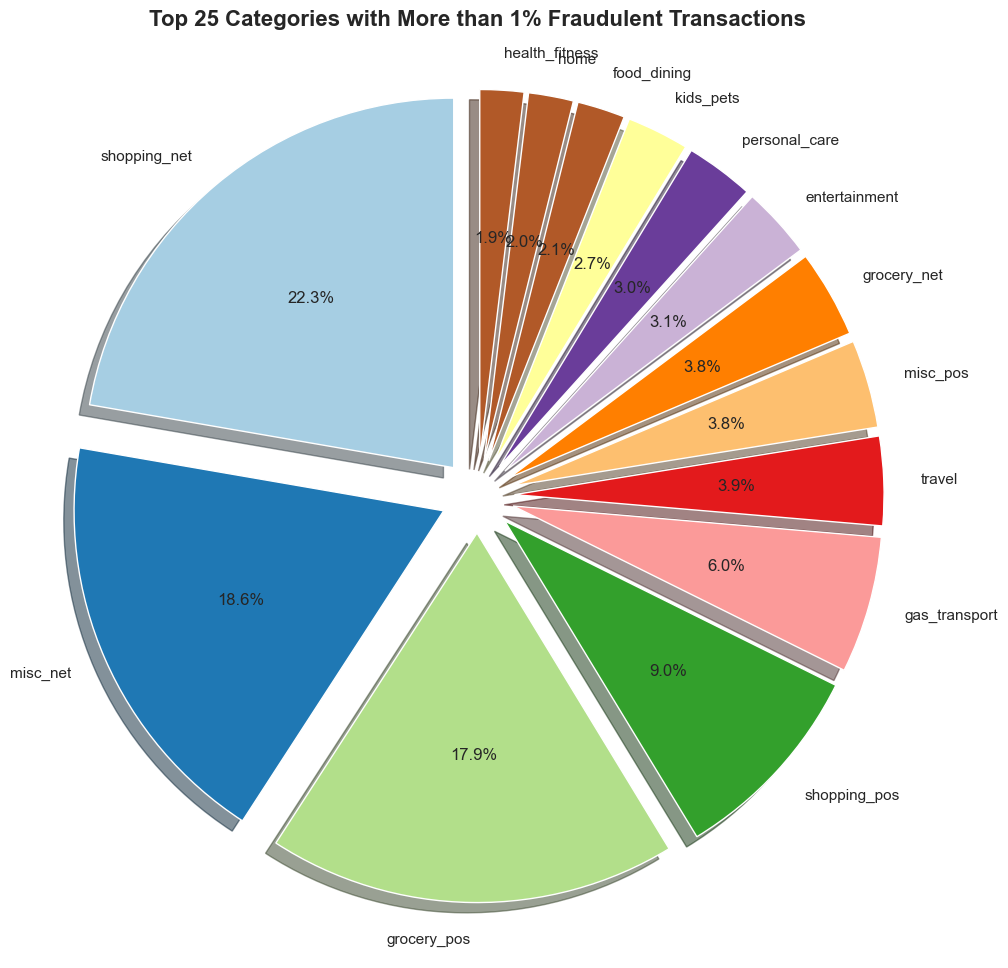

In [44]:
import matplotlib.pyplot as plt

# Assuming df_fraud_category is your DataFrame with columns 'category', 'is_fraud', and 'Transaction percentage'
# Filter the DataFrame for categories with more than 1% fraudulent transactions and get the top 25
subset_df = df_fraud_category[(df_fraud_category['is_fraud'] == 1) & (df_fraud_category['Transaction percentage'] >= 0.1)].nlargest(25, 'Transaction percentage')

# Define a color palette
colors = plt.cm.Paired(range(len(subset_df)))

# Create a pie chart
plt.figure(figsize=(12, 12))
plt.pie(subset_df['Transaction percentage'], labels=subset_df['category'], autopct='%1.1f%%', startangle=90,
        colors=colors, shadow=True, explode=[0.1] * len(subset_df))
plt.title('Top 25 Categories with More than 1% Fraudulent Transactions', fontsize=16, fontweight='bold')

plt.show()


In [45]:
fraud_df.columns

Index(['cc_num', 'merchant', 'category', 'amt', 'gender', 'street', 'city',
       'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'trans_num',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'trans_hour',
       'trans_day_of_week', 'trans_year_month', 'age', 'age_category'],
      dtype='object')

In [46]:
fraud_df.columns

Index(['cc_num', 'merchant', 'category', 'amt', 'gender', 'street', 'city',
       'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'trans_num',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'trans_hour',
       'trans_day_of_week', 'trans_year_month', 'age', 'age_category'],
      dtype='object')

In [47]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming your DataFrame is named fraud_df

# Selecting relevant columns for logistic regression
# Choose predictors based on your understanding of the data and the problem
# For example, excluding columns like 'cc_num', 'trans_num', and 'unix_time'
predictors = ['amt', 'city_pop', 'trans_hour', 'age']

# Extracting predictors and outcome variable
X = fraud_df[predictors]
y = fraud_df['is_fraud'].astype(int)  # Ensure the outcome variable is binary (0 or 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Standardize the predictors (optional but often recommended)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add a constant to the predictors matrix
X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled)

# Fit logistic regression model
logit_model = sm.Logit(y_train, X_train_scaled)
result = logit_model.fit()

# Print summary of the regression
print(result.summary())

# Make predictions on the test set
y_pred = result.predict(X_test_scaled)

# You can further evaluate the model performance using metrics like accuracy, precision, recall, etc.
# Example using scikit-learn:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Convert predicted probabilities to binary predictions
y_pred_binary = (y_pred > 0.5).astype(int)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_binary))
print("Classification Report:\n", classification_report(y_test, y_pred_binary))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_binary))


Optimization terminated successfully.
         Current function value: 0.031740
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               is_fraud   No. Observations:               629145
Model:                          Logit   Df Residuals:                   629140
Method:                           MLE   Df Model:                            4
Date:                Thu, 14 Dec 2023   Pseudo R-squ.:                  0.1040
Time:                        23:40:19   Log-Likelihood:                -19969.
converged:                       True   LL-Null:                       -22286.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.3563      0.019   -287.499      0.000      -5.393      -5.320
x1             0.4460      0.

In [48]:
fraud_df.columns

Index(['cc_num', 'merchant', 'category', 'amt', 'gender', 'street', 'city',
       'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'trans_num',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'trans_hour',
       'trans_day_of_week', 'trans_year_month', 'age', 'age_category'],
      dtype='object')

In [49]:


#Drop columns
fraud_df = fraud_df.drop(['cc_num','merchant', 'category','street','city','state','zip','job','trans_num','unix_time',
                         'trans_hour', 'trans_day_of_week', 'trans_year_month','age'],axis = 1)



In [50]:
#convert to dummy variables
fraud_df = pd.get_dummies(fraud_df, drop_first=True)


In [51]:
fraud_df.columns

Index(['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'gender_M',
       'is_fraud_1', 'age_category_Young Adults', 'age_category_Adults',
       'age_category_Middle-aged', 'age_category_Seniors',
       'age_category_Retired'],
      dtype='object')

In [52]:
# Separate X and y variables
predictors = [ 'amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'gender_M', 'age_category_Young Adults', 'age_category_Adults',
       'age_category_Middle-aged', 'age_category_Seniors',
       'age_category_Retired']
outcome = 'is_fraud_1'

# Partition
X = fraud_df[predictors]
y = fraud_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4)

# Train a decision tree with seed value
classTreefraud = DecisionTreeClassifier(random_state=7, max_depth=4)  
classTreefraud.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=4, random_state=7)

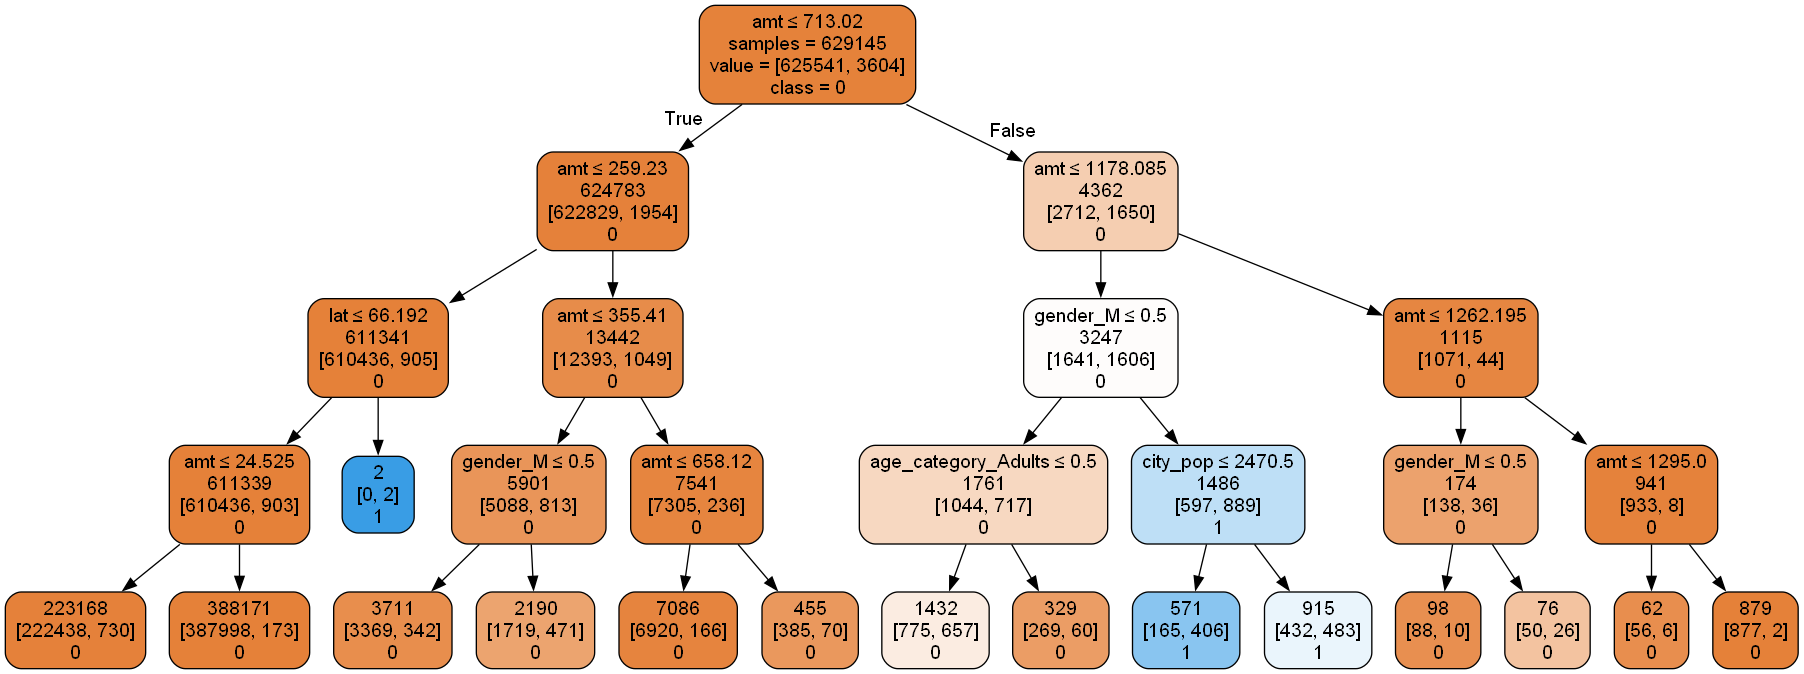

In [53]:
plotDecisionTree(classTreefraud, feature_names=predictors, class_names=classTreefraud.classes_)

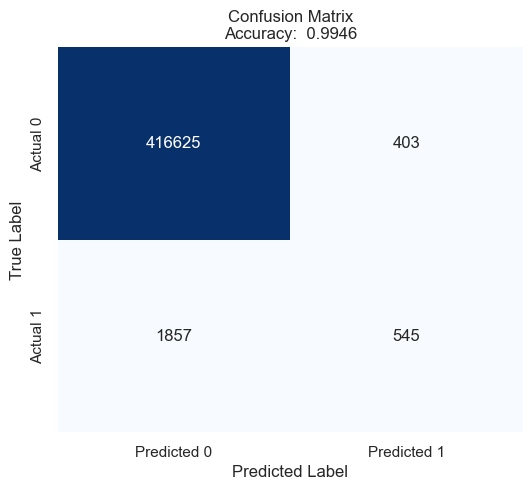

In [54]:
predicted_labels2 = classTreefraud.predict(valid_X)
# Calculate accuracy
accuracy = accuracy_score(valid_y, predicted_labels2)
# Plot the confusion matrix as a heatmap with accuracy information in the title
conf_matrix = confusion_matrix(valid_y, predicted_labels2)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"Confusion Matrix\nAccuracy: {accuracy: .4f}")
plt.show()

In [55]:
# For training data
train_predictions = classTreefraud.predict(train_X)
train_accuracy = accuracy_score(train_y, train_predictions)
print(f"Training Accuracy: {train_accuracy}")

# For validation data
valid_predictions = classTreefraud.predict(valid_X)
valid_accuracy = accuracy_score(valid_y, valid_predictions)
print(f"Validation Accuracy: {valid_accuracy}")

Training Accuracy: 0.9947388916704416
Validation Accuracy: 0.9946117349736547


In [56]:
# Start with an initial guess for parameters
param_grid = {
    'max_depth': [10, 20, 30, 40], 
    'min_samples_split': [20, 40, 60, 80, 100], 
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1) #n_jobs=-1 means 
        #that the availalbe computer memory (CPU) will be used to make calculations faster. 
gridSearch.fit(train_X, train_y)
print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)

Initial score:  0.9950520150362794
Initial parameters:  {'max_depth': 10, 'min_impurity_decrease': 0, 'min_samples_split': 80}


In [68]:
# Adapt grid based on result from initial grid search
param_grid = {
    'max_depth': list(range(8, 16)), 
    'min_samples_split': list(range(70, 83)), 
    'min_impurity_decrease': [0.0009, 0.001, 0.0011], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Improved score: ', gridSearch.best_score_)
print('Improved parameters: ', gridSearch.best_params_)

bestClassTree = gridSearch.best_estimator_

Improved score:  0.9942715908097497
Improved parameters:  {'max_depth': 8, 'min_impurity_decrease': 0.0009, 'min_samples_split': 70}


In [69]:
classificationSummary(valid_y, bestClassTree.predict(valid_X))

Confusion Matrix (Accuracy 0.9943)

       Prediction
Actual      0      1
     0 417028      0
     1   2402      0


In [64]:
fraud_df.head(2)

,amt,lat,long,city_pop,merch_lat,merch_long,gender_M,is_fraud_1,age_category_Young Adults,age_category_Adults,age_category_Middle-aged,age_category_Seniors,age_category_Retired
0,4.970000,36.078800,-81.178100,3495,36.011293,-82.048315,0,0,1,0,0,0,0
1,107.230000,48.887800,-118.210500,149,49.159047,-118.186462,0,0,0,1,0,0,0


In [65]:
newfraud = pd.DataFrame([{'amt': 499, 'lat':32.7940912, 'long': -77.12313, 'city_pop':621, 'merch_lat':73.7126433, 'merch_long':-91.36623, 'gender_M':1,
        'age_category_Young Adults':0, 'age_category_Adults':0,
       'age_category_Middle-aged':1, 'age_category_Seniors':0,
       'age_category_Retired':0}])
newfraud

,amt,lat,long,city_pop,merch_lat,merch_long,gender_M,age_category_Young Adults,age_category_Adults,age_category_Middle-aged,age_category_Seniors,age_category_Retired
0,499,32.794091,-77.123130,621,73.712643,-91.366230,1,0,0,1,0,0
